In [15]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

In [16]:
def plot_df(filename):
    df = pd.read_csv(filename) 
    epochs = df["Epoch"].values
    train_acc = df["train Accuracy"].values
    val_acc = df["val Accuracy"].values
    train_loss = df["train Loss"].values
    val_loss = df["val Loss"].values

    xmax = epochs[np.argmax(val_acc)]
    ymax = val_acc.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)

    fig, ax = plt.subplots()

    l1, l2 = ax.plot(epochs, train_acc, epochs, val_acc)

    ax.legend((l1, l2), ('Train Accuracy', 'Val Accuracy'), loc='lower right', shadow=True)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy vs Epochs')

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    plt.show()
    print("")

In [17]:
def get_val_acc(filename):
    df = pd.read_csv(filename)
    epochs = df["Epoch"].values
    val_acc = df["val Accuracy"].values
    
    return epochs, val_acc

Comparing Image only, Text only, and Multimodal Classification


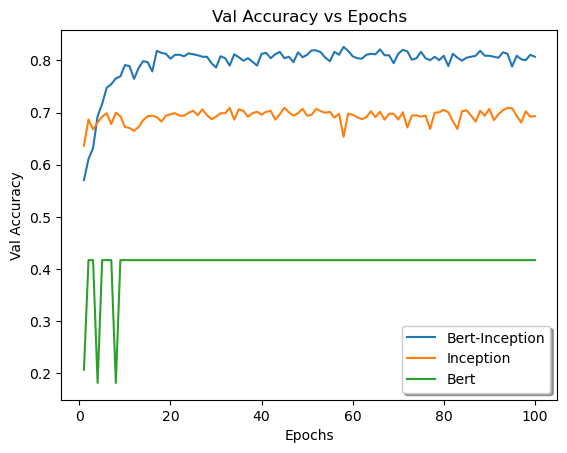

In [27]:
print("Comparing Image only, Text only, and Multimodal Classification")
epochs, val_incep_bert = get_val_acc("100epochs_lr_0_001_new.csv")
_, val_incep = get_val_acc("inception_100epochs_lr_0.001.csv")
_, val_bert = get_val_acc("100epochs_lr_0_001_bert.csv")

fig, ax = plt.subplots()

l1, l2, l3 = ax.plot(epochs, val_incep_bert, epochs, val_incep, epochs, val_bert)

ax.legend((l1, l2, l3), ('Bert-Inception', 'Inception', 'Bert'), loc='best', shadow=True)
ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy vs Epochs')

plt.show()

Bert-InceptionV2 multimodal learning
Comparing different learning rates.


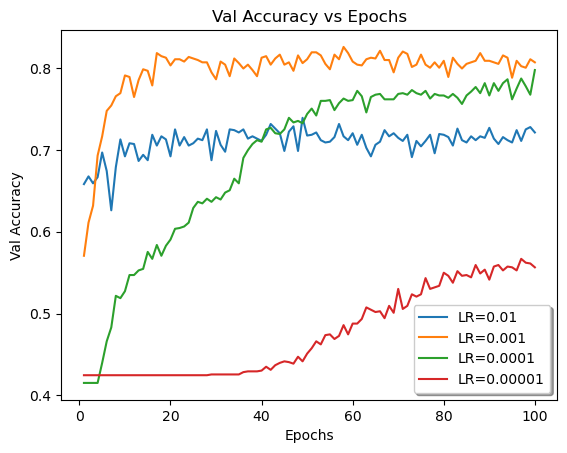

In [21]:
print("Bert-InceptionV2 multimodal learning\nComparing different learning rates.")
epochs, val_0_01 = get_val_acc("100epochs_lr_0.01.csv")
_, val_0_001 = get_val_acc("100epochs_lr_0_001_new.csv")
_, val_0_0001 = get_val_acc("100epochs_lr_0_0001.csv")
_, val_0_00001 = get_val_acc("100epochs_lr_0_00001.csv")

fig, ax = plt.subplots()

l1, l2, l3, l4 = ax.plot(epochs, val_0_01, epochs, val_0_001, 
                         epochs, val_0_0001, epochs, val_0_00001)

ax.legend((l1, l2, l3, l4), ('LR=0.01', 'LR=0.001', 'LR=0.0001', 'LR=0.00001'), loc='best', shadow=True)
ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy vs Epochs')

plt.show()

Best performing model - Train and Val Accuracies.
Batch size = 16, lr=0.001


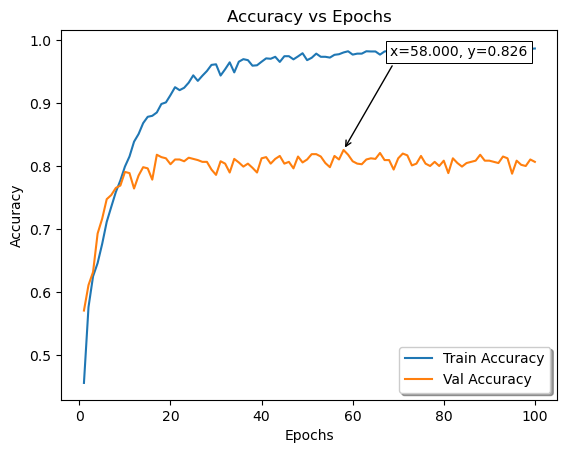

In [23]:
print("Best performing model - Train and Val Accuracies.")
print("Batch size = 16, lr=0.001")
plot_df("100epochs_lr_0_001_new.csv")

Val accuracies of best performing Bert-InceptionV2 multimodal classification at different Batch sizes.


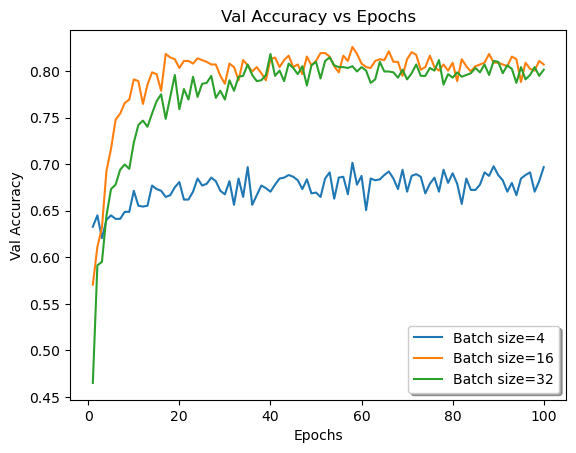

In [24]:
print("Val accuracies of best performing Bert-InceptionV2 multimodal classification at different Batch sizes.")
epochs, val_bs4 = get_val_acc("100epochs_lr_0_001_batchsize4.csv")
_, val_bs16 = get_val_acc("100epochs_lr_0_001_new.csv")
_, val_bs32 = get_val_acc("100epochs_lr_0_001_batchsize32.csv")

fig, ax = plt.subplots()

l1, l2, l3 = ax.plot(epochs, val_bs4, epochs, val_bs16, epochs, val_bs32)

ax.legend((l1, l2, l3), ('Batch size=4', 'Batch size=16', 'Batch size=32'), loc='best', shadow=True)
ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy vs Epochs')

plt.show()

Effect of Learning rate on Test accuracy of Bert-InceptionV2 Dual Classifier.


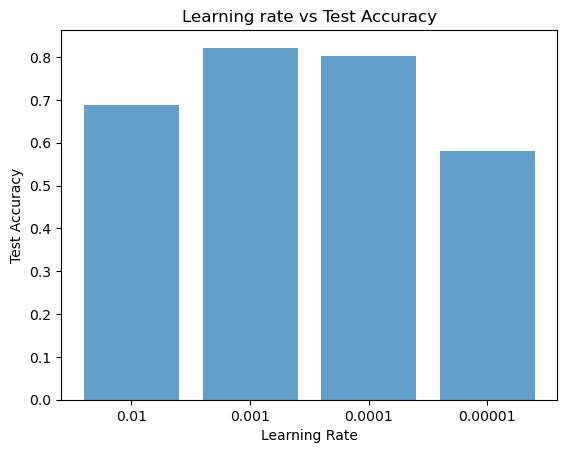

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()

print("Effect of Learning rate on Test accuracy of Bert-InceptionV2 Dual Classifier.")
objects = ('0.01', '0.001', '0.0001', '0.00001')
y_pos = np.arange(len(objects))
performance = [0.6875, 0.82197, 0.80208, 0.58049]

plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Learning rate vs Test Accuracy')

plt.show()

Effect of Batch size on Test accuracy of Bert-InceptionV2 Dual Classifier.


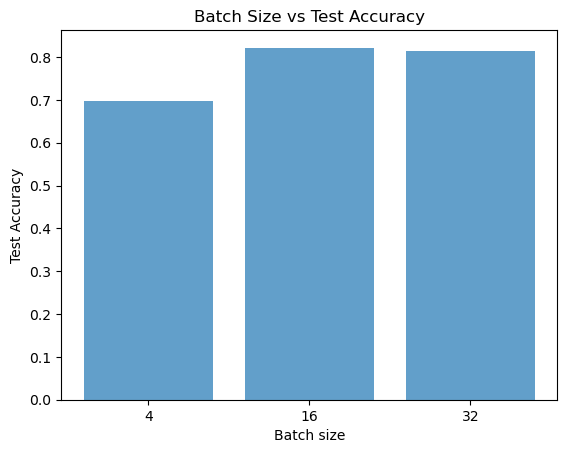

In [26]:
print("Effect of Batch size on Test accuracy of Bert-InceptionV2 Dual Classifier.")

objects = ('4', '16', '32')
y_pos = np.arange(len(objects))
performance = [0.6981, 0.82197, 0.81345]

plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.xlabel('Batch size')
plt.ylabel('Test Accuracy')
plt.title('Batch Size vs Test Accuracy')

plt.show()

In [10]:
#lr = 0.01 - test acc = 0.6875
#lr = 0.001 - test acc = 0.82197
#lr = 0.0001 - test acc = 0.80208
#lr = 0.00001 - test acc = 0.58049

#lr = 0.001 - test acc = 0.81345 (batch_size = 32)
#lr = 0.001 - test acc = 0.6981 (batch_size = 4)

In [11]:
#  supported values are 'best', 'upper right', 'upper left', 
#     'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

In [12]:
# text = ["aim high", "it's never too late", "work harder", "do drugs", "help your neighbor", "beat you neighbor's dog", "starve your bunny", "feed your dog"]